In [40]:
# Small scripts to play with data and perform simple tasks

# You can play with various datasets from here: https://archive.ics.uci.edu/ml/index.php

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

pd.set_option('float_format', '{:f}'.format)

In [42]:
# Read data using pandas
df = pd.read_csv('./data/kc_house_data.csv')

In [43]:
# Print dimensions
print(df.shape)
# Print a few rows
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,0,...,7,1180.000000,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,6414100192,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,0,...,7,2170.000000,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,5631500400,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,0,...,6,770.000000,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,2487200875,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,0,...,7,1050.000000,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1954400510,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,0,...,8,1680.000000,0,1987,0,98074,47.616800,-122.045000,1800,7503


In [44]:
# Other way to read file, using numpy
from numpy import genfromtxt
# Read 2 specific columns
data = genfromtxt('./data/kc_house_data.csv',delimiter=',',usecols=(2,5)) 

# Print dimensions
print(f'Dimensions: {data.shape}\n')

# Print data
print('price\tsqft_living')
for i in range(1,5):
    print(np.array2string(data[i], formatter={'float_kind':'{0:.1f}'.format}))

Dimensions: (21614, 2)

price	sqft_living
[221900.0 1180.0]
[538000.0 2570.0]
[180000.0 770.0]
[604000.0 1960.0]


In [45]:
# Continue with the dataframe
# Check to see if there are any null values in the data
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [46]:
# Check out the data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [47]:
# Get a summary of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312057,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
# Describe a specific attribute
df['price'].describe()

count     21613.000000
mean     540088.141767
std      367127.196483
min       75000.000000
25%      321950.000000
50%      450000.000000
75%      645000.000000
max     7700000.000000
Name: price, dtype: float64

In [49]:
# Some comments: 
# We are working with a data set that contains 21,613 observations (see count)
# Mean price is approximately $540k 
# Median price is approximately $450k 
# Average house area is ~ 2080 ft2

Text(0.5, 1.0, 'Histogram of Housing Prices')

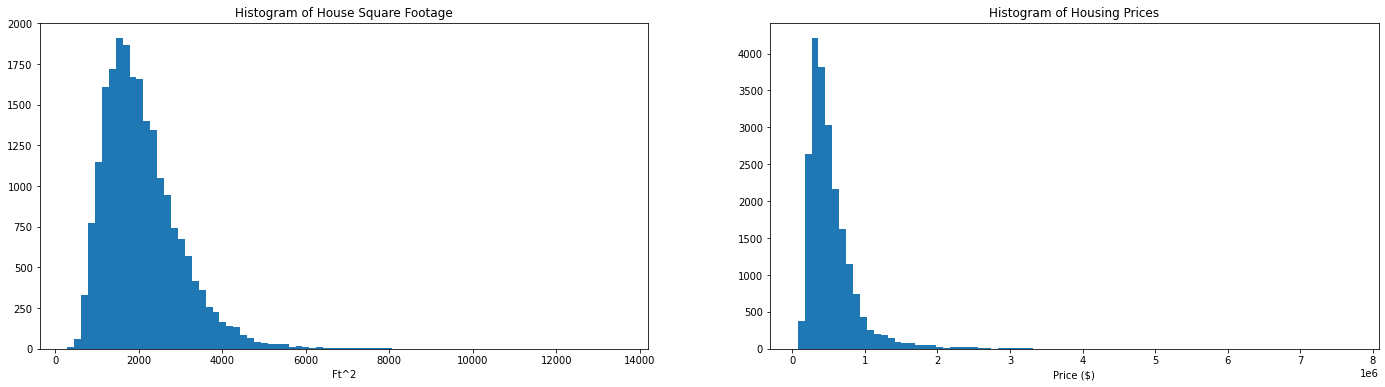

In [50]:
# Let's plot some histograms

fig = plt.figure(figsize=(24, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram of House Square Footage")

cost.hist(df.price, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram of Housing Prices")

In [51]:
# Observation:
# Both variables have a distribution that is right-skewed.

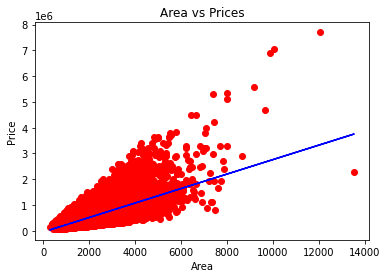

In [52]:
# Let's do some regression analysis
from sklearn.linear_model import LinearRegression
from numpy import linspace, matrix

linreg = LinearRegression()

prices = np.array(list(df['price']))
prices = prices.reshape(-1,1)
area = np.array(list(df['sqft_living']))
area = area.reshape(-1,1)

linreg.fit(area, prices)

# Plot outputs
plt.scatter(area, prices, color = 'red')
plt.plot(area, linreg.predict(area), color = 'blue')
plt.title('Area vs Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


In [55]:
# Generate synthetic data examples
from faker import Faker
fake = Faker()

name = fake.name()
address = fake.address()

print(f'Random name:\n{name}\n')
print(f'Random address:\n{address}')

Random name:
Richard Johnson

Random address:
6711 Sarah Dam Suite 685
Andreaton, WV 96474


In [56]:
# continue with synthetic data
job = fake.job()
num = fake.pyint()
phone = fake.phone_number()
name_f = fake.first_name_female()
email = fake.ascii_email()
geo = fake.latlng()
date = fake.date()
company = fake.company()

print(f'Random job: {job}')
print(f'Random number: {num}')
print(f'Random phone: {phone}')
print(f'Random female name: {name_f}')
print(f'Random email: {email}')
print(f'Random geolocation: {geo}')
print(f'Random date: {date}')
print(f'Random company: {company}')

Random job: IT sales professional
Random number: 6922
Random phone: (828)418-1845
Random female name: Amanda
Random email: powerszachary@hotmail.com
Random geolocation: (Decimal('60.255289'), Decimal('125.074706'))
Random date: 2006-08-30
Random company: Morales LLC


In [58]:
# What about GR synthetic data?

fake = Faker('el_GR')

name = fake.name()
address = fake.address()

print(f'Random name:\n{name}\n')
print(f'Random address:\n{address}\n')

job = fake.job()
num = fake.pyint()
phone = fake.phone_number()
name_f = fake.first_name_female()
email = fake.ascii_email()
geo = fake.latlng()
date = fake.date()
company = fake.company()
print(f'Random job: {job}')
print(f'Random phone: {phone}')
print(f'Random female name: {name_f}')
print(f'Random company: {company}')

Random name:
Ζησούλα Κυριάκου

Random address:
Ψυρρή 025,
ΤΚ 148 54 Άμφισσα

Random job: Σιδεράς - Σιδηρουργός
Random phone: +306965384417
Random female name: Γλαύκη
Random company: Μαστρογιώργης Group


In [59]:
# Play with SQL

import sqlite3

# Create a connection
conn = sqlite3.connect('./data/example.db')

# Create a table
conn.execute('''CREATE TABLE EMPLOYEE
             (ID INT PRIMARY KEY     NOT NULL,
             NAME           TEXT    NOT NULL,
             AGE            INT     NOT NULL,
             ADDRESS        CHAR(50),
             SALARY         REAL);''')

# Close connection
conn.close()

In [60]:
# Insert some records
conn = sqlite3.connect('./data/example.db')

conn.execute("INSERT INTO EMPLOYEE (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (1, 'Bob', 32, 'California', 20000.00 )");

conn.execute("INSERT INTO EMPLOYEE (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (2, 'Alice', 25, 'Texas', 15000.00 )");

conn.execute("INSERT INTO EMPLOYEE (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (3, 'Joe', 23, 'Norway', 20000.00 )");

conn.execute("INSERT INTO EMPLOYEE (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (4, 'Mary', 25, 'Rich-Mond ', 65000.00 )");

conn.commit()
conn.close()

In [61]:
# Perform query
conn = sqlite3.connect('./data/example.db')

cursor = conn.execute("SELECT id, name, address, salary from EMPLOYEE")
for row in cursor:
    print(f'ID: {row[0]}')
    print(f'NAME: {row[1]}')
    print(f'ADDRESS: {row[2]}')
    print(f'SALARY: {row[3]}')
    print()

conn.close()

ID: 1
NAME: Bob
ADDRESS: California
SALARY: 20000.0

ID: 2
NAME: Alice
ADDRESS: Texas
SALARY: 15000.0

ID: 3
NAME: Joe
ADDRESS: Norway
SALARY: 20000.0

ID: 4
NAME: Mary
ADDRESS: Rich-Mond 
SALARY: 65000.0



In [67]:
# Perform update
conn = sqlite3.connect('./data/example.db')

conn.execute("UPDATE EMPLOYEE set SALARY = 30000.00 where ID = 1")
conn.commit()
print(f'Total number of rows updated: {conn.total_changes}')

# Check the updated result
cursor = conn.execute("SELECT id, name, address, salary from EMPLOYEE")
for row in cursor:
    print(f'ID: {row[0]}')
    print(f'NAME: {row[1]}')
    print(f'ADDRESS: {row[2]}')
    print(f'SALARY: {row[3]}')
    print()

conn.close()

Total number of rows updated: 1
ID: 1
NAME: Bob
ADDRESS: California
SALARY: 30000.0

ID: 3
NAME: Joe
ADDRESS: Norway
SALARY: 20000.0

ID: 4
NAME: Mary
ADDRESS: Rich-Mond 
SALARY: 65000.0



In [63]:
# Perform delete
conn = sqlite3.connect('./data/example.db')

conn.execute("DELETE from EMPLOYEE where ID = 2;")
conn.commit()
print(f'Total number of rows updated: {conn.total_changes}')

# Check the updated result
cursor = conn.execute("SELECT id, name, address, salary from EMPLOYEE")
for row in cursor:
    print(f'ID: {row[0]}')
    print(f'NAME: {row[1]}')
    print(f'ADDRESS: {row[2]}')
    print(f'SALARY: {row[3]}')
    print()

conn.close()

Total number of rows updated: 1
ID: 1
NAME: Bob
ADDRESS: California
SALARY: 25000.0

ID: 3
NAME: Joe
ADDRESS: Norway
SALARY: 20000.0

ID: 4
NAME: Mary
ADDRESS: Rich-Mond 
SALARY: 65000.0



In [64]:
# Accessing SQL records with pandas
conn = sqlite3.connect('./data/example.db')
df = pd.read_sql_query("SELECT * from EMPLOYEE", conn)

conn.close()
df

,ID,NAME,AGE,ADDRESS,SALARY
0,1,Bob,32,California,25000.000000
1,3,Joe,23,Norway,20000.000000
2,4,Mary,25,Rich-Mond,65000.000000


In [65]:
# Then, query the dataframe

# Example: get the persons with salary >= 25000
df[df.SALARY >= 25000]

,ID,NAME,AGE,ADDRESS,SALARY
0,1,Bob,32,California,25000.000000
2,4,Mary,25,Rich-Mond,65000.000000
